In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


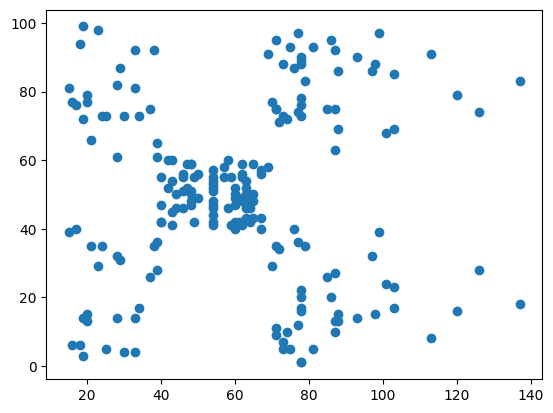

In [7]:
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])

<Axes: >

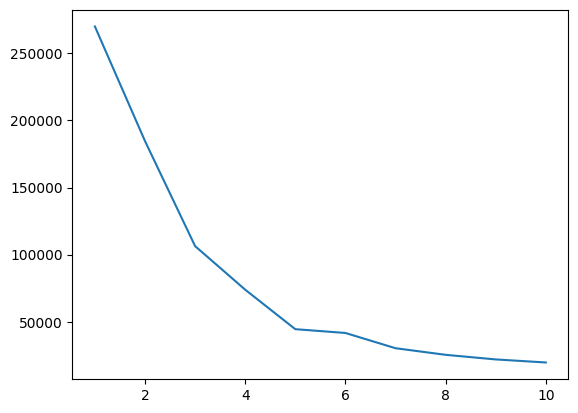

In [16]:
from sklearn.cluster import KMeans

X = df[["Annual Income (k$)","Spending Score (1-100)"]]
centroids = []
for k in range(1, 11):
  km_cluster = KMeans(n_clusters=k)
  km_cluster.fit(X)
  centroids.append(km_cluster.inertia_)

# visualizing the line for determining K
sns.lineplot(x=range(1, 11), y=centroids)

In [17]:
k_means = KMeans(n_clusters=5)
y_pred = k_means.fit_predict(X)
y_pred[0]

4

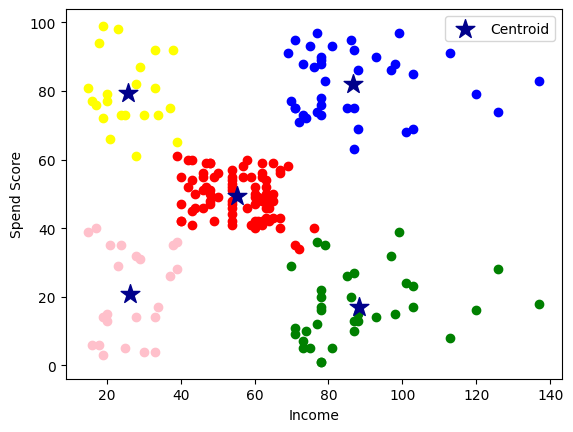

In [34]:
colors = ["red", "blue", "green", "yellow", "pink"]

for i in range(0, 5):
  plt.scatter(X[y_pred==i]["Annual Income (k$)"], X[y_pred==i]["Spending Score (1-100)"], color=colors[i])

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], color="darkblue", s=200, marker="*", label="Centroid")
plt.xlabel("Income")
plt.ylabel("Spend Score")
plt.legend()
plt.show()

array([55.2962963 , 86.53846154, 88.2       , 25.72727273, 26.30434783])

In [26]:
k_means.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])